# Coursework_7137CEM-DEEP LEARNING

Outline of the contents in the notebook
1. Taher's notebook with annotations  
    1.1 CNN Model  
    1.2 Tranfer Learning Model based on MobileNetV2  
    1.3 Fine Tuned Model using VGG19  
2. Experiments with Tahers Model and Summary  
    2.1 Summary of experiments  
    2.2 Improved Model from experiments  
3. Transfer Learning Models using other pre-trained models  
    3.1 Transfer Learning Model using VGG19  
    3.2 Transfer Learning Model using VGG16  
    3.3 Summary of the models  
4. Fine Tuned Model Using VGG16  
5. Summary and Conclusions  
    5.1 Comparison of Results with other research and Literature  
6. References  

## 1. Taher's notebook with annotations

In the original notebook Taher has created 3 different models
1. CNN model designed by Taher
2. Tranfer Learning model using Pre-trained model MobileNetV2
3. Fine tuned model using Pre-trained model VGG19

### 1.1 CNN Model from Taher

From the next cell, every cell with code will be precided by a markdown cell with explaination

#### 1.1.1 Importing necessary Libraries
The code in the section below, is importing all the neccesarry libraries for the macine learningn and image processing tasks.
The following libraries are imported:
1. NumPy: It is a library required for the powerfull numerical operation in python.
2. Pandas: Pandas is a data manipulation and data analysis library. It has data structures used for efficiently storing and processing the data.
3. Matplotlib: Its a library for creating the visuallizations such as graphs and charts in python
4. OpenCV: OpenCV is an opensource computer vision and machine learning library
5. Tensorflow: Tensorflow is open source machine/deep learning framework which is developed by google. The layers in CNN like convolutional layer, batch normalization, maxpooling and the pretrained model liek VGG19, VGG16 will be imported from this library.
6. Pillow(PIL Fork): Its an open source image processing library
7. Scikit-Learn: Its an open source ML library, which contains ML algorithms and tools
8. Tensorflow Hub: Its a library for the reusable ML modules.

Then we are also importing various component from the Tensorflow and Keras, which is API providing an interface to build, train and deploy the deep learning models.
There also a line of code at the end which checks for the availability of the GPUs and prints the number of GPU.

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


#### 1.1.2 Setting the root directory for the taining and testing data
The cell below is basically setting up the data parameters that will be used by the model and setting the path for them.
- data_dir is the the variable storing the path for the root directory of the benchmark dataset
- train_path is the variable storing the path for the training data set which will located inside the root directory.
- test_path is the storing the path for the Test set which is again located inside the root directory.

The dataset used for the model is from the kaggle. The folder structure of the directory is defined by kaggle which is as follow:

/ (root)  
|-- input/  
|   |-- dataset_name/  
|       |-- train/  
|       |   |-- image1.jpg  
|       |   |-- image2.jpg  
|       |   |-- ...  
|       |-- test/  
|       |   |-- image3.jpg  
|       |   |-- image4.jpg  
|       |   |-- ...  
|       |-- train.csv (optional, metadata or labels for training set)  
|       |-- test.csv (optional, metadata for test set)  

The next two lines of code are defining the height and width for resizing the images.
So in short this cell defines the root data directory path and variable and also specifies the desired height and width of the images.

In [2]:
data_dir = '/home/pg19/Desktop/input/gtsrb-german-traffic-sign/'
train_path = '/home/pg19/Desktop/input/gtsrb-german-traffic-sign/Train/'
test_path = '/home/pg19/Desktop/input/gtsrb-german-traffic-sign/Test/'
height = 50
width = 50

#### 1.1.3 Defining the classes dictionary
The code in the following cell is defining the dictionary called classed, which is mapping the Text discriptions of the the traffic sings to a numerical value or lable.
Numerical lables are key and textual discriptions are values.
There are total 43 class lables defined.
this dictionary would be used while predicting the sign by the learing model
The model would predict the numerical lable for the input image and then it would use dictionary to find its text description.

In [3]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


#### 1.1.4 Setting the Batch Size and Seed
Following cell, defines the parameteres batch_size and seed for the model training
- seed is an arbitary value set to ensure that the random processes give the same results everytime they are run. This makes sure of the reproducibility.
- batch_size is a very significant parameter in learing modules. It is the number of samples that will be used in each batch during the trainin or evaluation of learingn models.
  its a hyperparameter that is set based on the availability of the resources.
- Varying batch size can have different effect on the model as follow:
1. larger batch size increases the training speed, but it increases the resource requirement as more memory is needed
2. smaller batch sizes can increase the accuracy of the model as the weights of the model are revised more frequently
3. smaller batch might need smaller learning rate whereas larger batch sizes need larger learning rates.
4. smaller batch sizes can lead to introduction of more noise.  
                                                                             *(Radiuk, Pavlo. (2017). Impact of Training Set Batch Size on the Performance of Convolutional Neural Networks for Diverse Datasets. Information Technology and Management Science,2017)*

In [4]:
batch_size = 150
seed = 42

#### 1.1.5 Loading and Preprocessing the data for training
The code in the next cell is setting up the image generators to load and preprocess the images used for for learning model.
1. 'train_datagen and test_datagen':
These are the instances of the ImageDataGenerator class from keras which will aigment and preprocess the images.
rescale argument to function is for scalling the images to values between [0,1].
validation_split of 0.2 basically means that the 20 percent of the images will be used for validation.

2. train_dataset and test_dataset: 
These variables store the dataset for the learning model gnerated by flow_from_directory method of datagen object.
flow_from_directory method generates batches of images from the directory.
The arguments are as follow:
- train_path is the path for the training images
- target size specifies the size to which the images will be resized
- batch_size is the number of the samples in one batch 
- class mode which is set to categorical signifies that the model would use one hot encoded lables during training and execution  
(https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)  
(https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
##### One Hot Encoding: 
Its an encoding type used by the learning model to represent the class lables.
In this method the class lables are represented as binary vector having the length equal to total number of classes. In this case the length would be 43.
The class is represent as the only one element in the vector which is the belonging to the actual class is set to 1 and the rest of the elements are set to 0.
There are other modes present such as Binary, Sparse, Input and None.

- setting the shuffle to true enables the shuffling of the order of the images during each iteration
- seed ensures the reproducibility as we have seen before.
- color mode is set to RGB.
- interpolation type is set to hamming
- subset is set to training which means that this dataset is for training the model
- and in the other its set to validation which means its for the validation.  
- There are other types of encoding such as Binary and Sparse.  
(https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/ )

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


#### 1.1.6 Creating a plot of random images from dataset
The code in the next cell is creating a plot of 3x4 size and populating the subplots with the random images from the dataset and its actual lable.

- The first line if creating a single figure and then total 12 subplots within the fig in the cofiguration of 3x4.
- second line is setting the size of the figure in inches
- third line is fetching the batch of images and its corrosponding lables.
- then there is a nested loop to populate the subplots, 
- variable 'l' stores a randomly generated index which is within the limits of batch_size, it will be used to chose the image of that index
- then the variable lable is storing the actual lable of that chosen image of index 'l'
- the next two lines will diplay the randomly selected image and its lable in the figure.  
(https://matplotlib.org/stable/users/explain/axes/axes_intro.html)

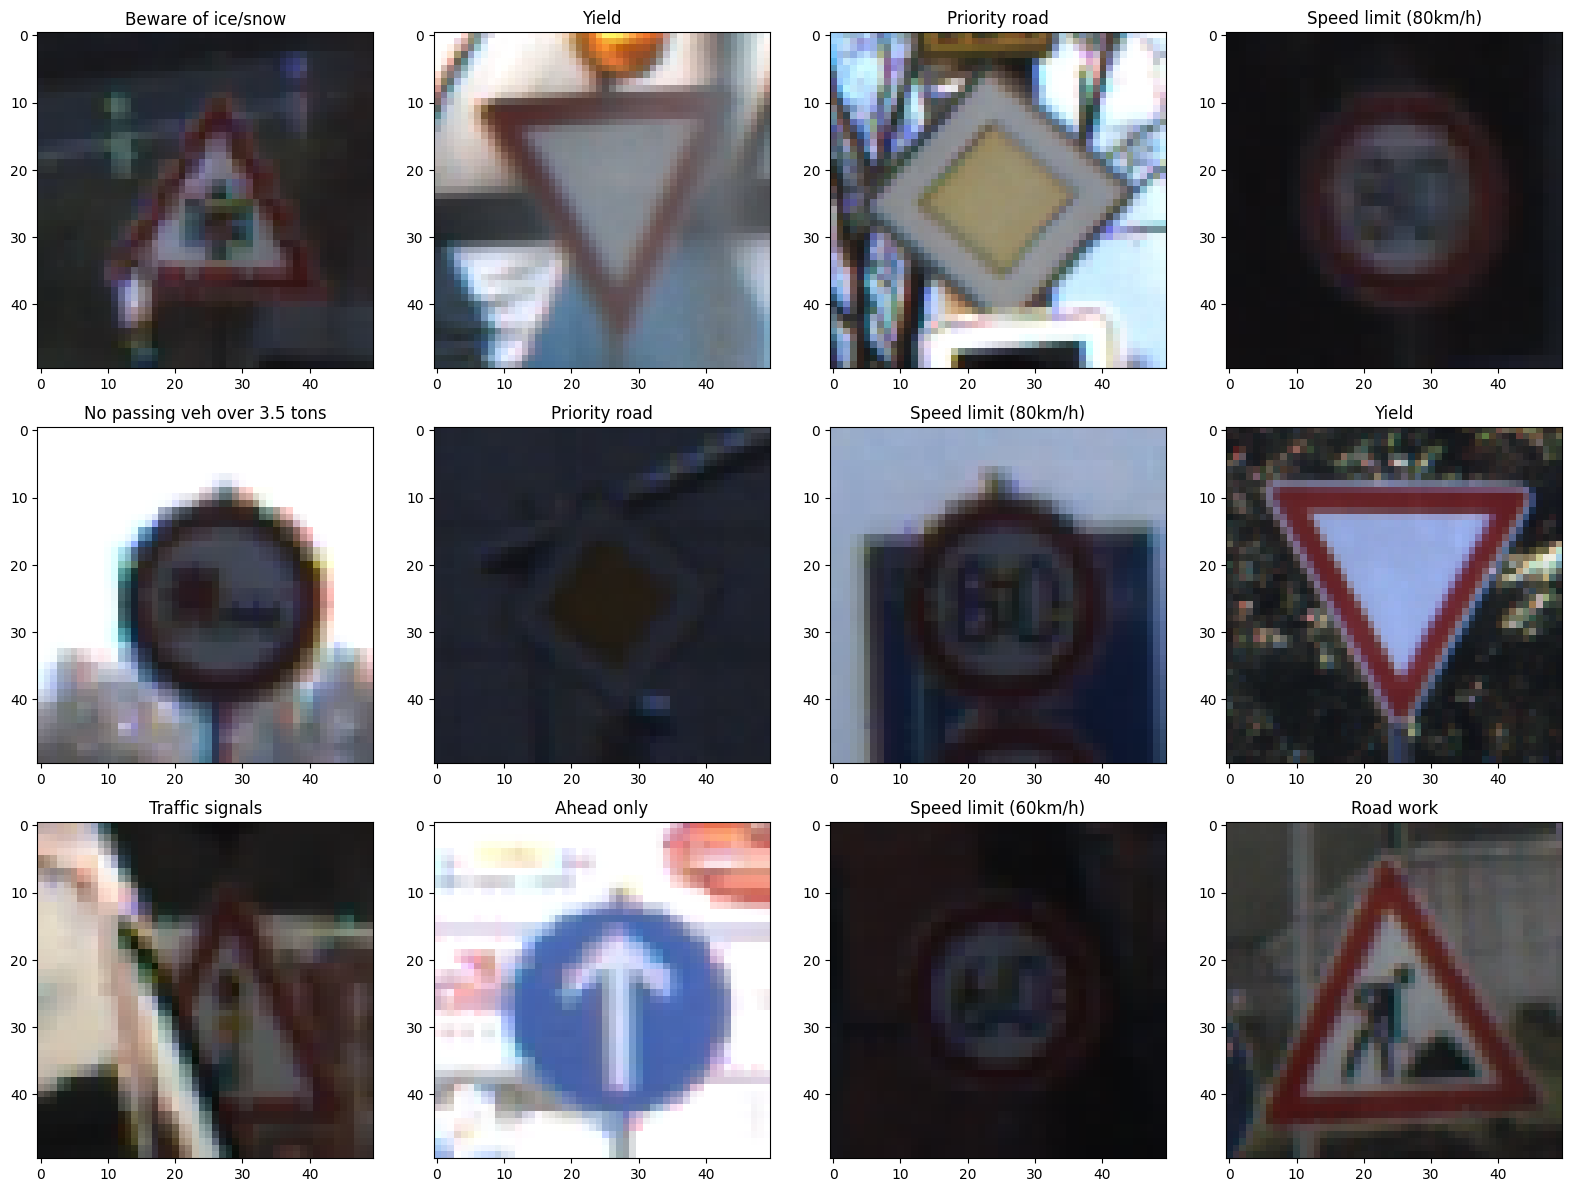

In [10]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

#### 1.1.7 Defining the Convolutional Neural Network and the layers used
The code in the next cell is defining a Convolutional Neural Network.
- There are total 14 layers in the model.
- The convolutional part of the model is divided into 2 lots. Each of the lot has 2 convolutional layers followed by a maxpooling and batch normalization layer. So these two lots have total 8 layers.
- after the convolutional part, there is a dropout layer followed by a flatten layer before the fully connected dense layer.
- and after the fully connected layer output layer is there.

This model is using following layers,
1. Convolutional Layer: 
Convolutional layer perform the task of feature extraction. It apply the filters to input to detect the features like edges, textures, patterns.
In the CNN, there are multiple convolutional layers used, this helps extracting more and more complex features.
Convolution layer has following parametes:
- Input shape: Its the shape of the input images defined as (height, width, chanels). Where height and width are the dimentions of the images and chanel is number of colors.
- filters: This is the total number of filter used. Each filter extracts a different feature
- kernel size: This is the size of the filter.Filters with larger kernel size are used to extract low level feature and smaller kernel size is used to extract high level features.

In this CNN, total 4 different convolutional layers are used. They are having different number filters and kernel sizes.
The number of filters ae more and kernel size is smaller in later layer, this helps in extracting the high level features.

- First convolutional layer has 16 filters and each is of size (5,5) which is defined as kernel size. Which means that the convolutional layer will have 16 filters of size 5x5.
The activation function used is ReLU which is Rectified Linear Unit.
The input shape is defined as (height,width,3), where height and width are defined as 50 earlier in the code. 3 here is basically the number of chanels.

- Second Convolutional layer: This convolutinal layer has 32 filters with kernel size of (5,5). Activation function is ReLU.
- Third convoluional layer: This convolutional layer have 64 filters with kernel size of  (3,3). Activation function is ReLU.
- Fourth convolutional layer: This convolutional layer also have 64 filters with kernel size of  (3,3). Activation function is ReLU.

The first two layers are the part of lot 1 and last two are part of second lot.

2. Maxpooling layer: These layers are used to reduce the spatial dimentions. Maxpooling retain the most important information, this helps reduce the computations and prevents overfitting. The maxpooling layer used here is with the pool size of (2,2). Which means that during maxpooling a window of size 2x2 would be slided over the input and it will take the maximum value within each window as the output.

3. Batch Normalization: This layer normalizes and scales the input to each layer. This helps in increasing the training speed. This model is using the batch normalization with axis = -1, which means that the normalization is applied to the along last axis.

Above layers are the part of the first block of layers.
After that there is another block of layers following the same pattern as the first one. Only difference is that the convolutional layer have 64 filters with kernel size of  (3,3). The low kernel size helps to extract more detailed features.

4. Dropout layer: The next layer after the two blocks is dropout layer. The purpose of this layer is to help prevent overfitting by introducing a form of regularization. That forces the model to learn more robust features.
Dropout layer sets the random fraction of input to 0. This reduces the reliance on the specific neuron.
Dropout rate is set to 0.25 in this model, which means it will set the neurons to 0 with the probability of 0.25

5. flatten layer: This layer flattens the output to one dimentional array before feeding it to densely connected layers. This layer is typically used before fully connected layer because, the output of convolutional layer is multidimensional and fully connected layers need one dimensinal data.

6. Dense layers: There are two dense layers used in this model. The first one with the activation function as ReLU is a fully connected layer. It performes the classification based on the previously learned features. The dense layer finds the patterns in the data provided by previous layer and every neuron in this layer is connected to every neuron of previous layer to collect the large number of data.

7. Output layer: The second dense layer is the output layer of the model. It uses the softmax activation funciton to produce the probability distributions for the classes.  

(https://keras.io/api/layers/convolution_layers/)  

*(Alzubaidi L, Zhang J, Humaidi AJ, Al-Dujaili A, Duan Y, Al-Shamma O, Santamaría J, Fadhel MA, Al-Amidie M, Farhan L. Review of deep learning: concepts, CNN architectures, challenges, applications, future directions. J Big Data,2021)*

In [6]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(43, activation='softmax')
])

#### 1.1.8 Model Summary Generation
The model.summary method generates the summary of the neural network model, summarry contains the info about architecture, the number of parameters in each layer and total number of parameters.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 21, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 21, 21, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        3

#### 1.1.9 Configuration and compilation of model

The code in the next cell configures and compiles the model.
First two lines set the values or alpha which is the learning rate and epoches which is the number of times the model will be trained.
After that the optimizer function is defined. In this case the Adam (Adamptive Moment Estimation) optimizer is being used. The input to optimizer is the learning rate, alpha.  
(https://keras.io/api/optimizers/adam/)
The last line code is using method 'compile' to configure and compile the model to make it ready for training.
The inputs for the method are:
- Optimizer which is set to optimizer 'optim' defined earlier.
- Loss function is set as categorical_crossentropy.
- metric, whcih is the evaluation metric used during training is set as accuracy.

##### Categoical Crossentropy
This is an commonly used loss function in models for multiclass classification.This function calculates the difference between predicted probability distribution and true probability distribution.  
The loss is calculated as negative of sum of multiplication of matrix of true probabilities and predicted probalities over the elements of matrices.
During training the goal is to reduce the loss.  
(https://neuralthreads.medium.com/categorical-cross-entropy-loss-the-most-important-loss-function-d3792151d05b)

In [8]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 1.1.10 Training the Neural Network
The following code is for the training of the model we have created.

- The code is using the model.fit method for training the model.The inputs to this method are as follow:

1. train_dataset: It is the dataset generator defined earlier. It will provide the batches of the data and its lables during the training.
2. steps_per_epoch : This parameter is set to a value of length of training dataset. It specifies the number samples to be drawn from the generator during training. As its set to the length of the dataset, it will draw all the samples.
3. epoch: Epoch is the number of times the model should be trained. As the value is set to 15 it will be trained 15 times.
4. Validation data: Validation data takes the input as the data generator which will generate the data for validation of the model during each epoch. The data generator being used here is test_dataset.
5. Validation_steps: It specifies the number of batches to take from the dataset during validation in each epoch. This parameter is also set to length of the data set so it will take all the batches.  
(https://keras.io/api/models/model_training_apis/)  

Output of this function is values of trainign accuracy and validation accuracy.  

**Training Accuracy vs Validation Accuracy**  
While training the model, there is risk of overfittin. To avoid thus scenario, the trainign database is divided in two parts, one is training dataset and another validation dataset. training dataset is used to train the model and validation data set is used to verify the model.
And while training the model, at every epoch the model is cross validated using validation dataset.
So the accuracy of the model on the training data set is the training accuracy and the accuracy of model with validation dataset is called validation accuracy.
Basically the training accuracy shows how well the model is being trained and validation accuracy represent the quality of the model, i.e. how well it will work with new data.

In [11]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

Epoch 1/15
210/210 [==============================] - 521s 2s/step - loss: 0.4755 - accuracy: 0.8825 - val_loss: 2.7658 - val_accuracy: 0.5583
Epoch 2/15
210/210 [==============================] - 301s 1s/step - loss: 0.0781 - accuracy: 0.9777 - val_loss: 0.5768 - val_accuracy: 0.8646
Epoch 3/15
210/210 [==============================] - 296s 1s/step - loss: 0.0363 - accuracy: 0.9895 - val_loss: 0.3972 - val_accuracy: 0.9088
Epoch 4/15
210/210 [==============================] - 305s 1s/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.4854 - val_accuracy: 0.8981
Epoch 5/15
210/210 [==============================] - 257s 1s/step - loss: 0.0400 - accuracy: 0.9889 - val_loss: 1.2753 - val_accuracy: 0.7495
Epoch 6/15
210/210 [==============================] - 205s 977ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.3015 - val_accuracy: 0.9390
Epoch 7/15
210/210 [==============================] - 200s 951ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.5424 - val_accuracy: 

#### 1.1.11 Creating the plots of accuracy and loss VS Epochs

Code in the following cell, creates a visual plot for the progression of the Loss and accuracy with every epoch.
It creates a graph for Accuracy vs Epochs and Loss vs Epochs. It plots both Training and Validation values for Loss and accuracy.

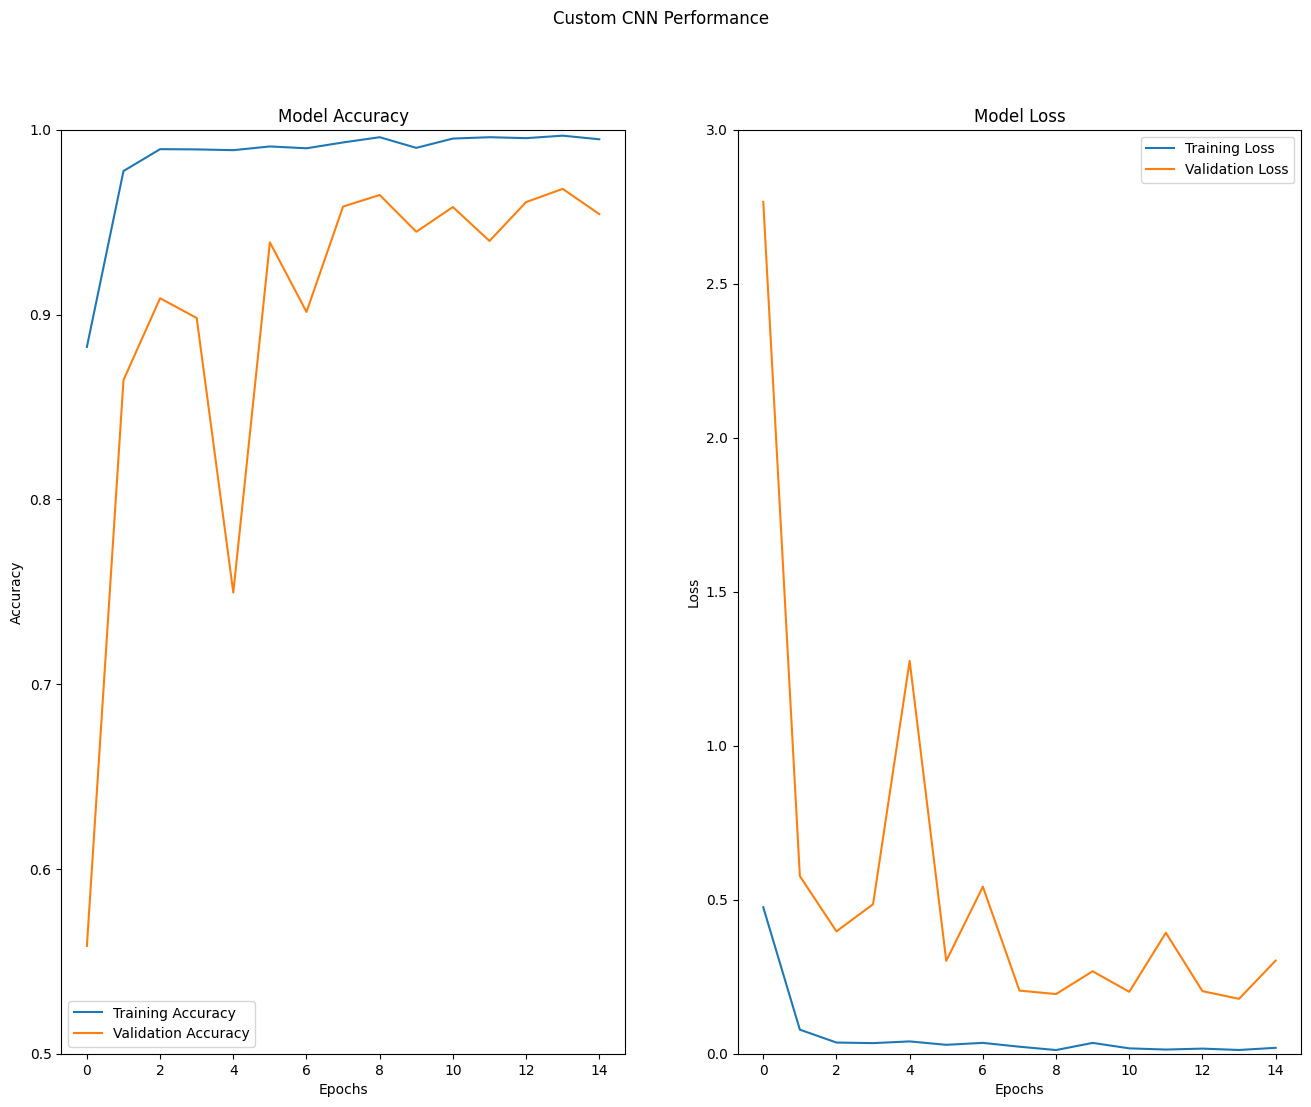

<Figure size 1000x700 with 0 Axes>

In [14]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,3)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [15]:
model.save("CNN.h5")

/home/pg19/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### 1.1.12 Preparing test data for the Learning model
This block of code prepares the Test data for Learning model.  
And the code on the first two lines define a method map_pred that takes the array of predicted values and returns the corrosponding the class lable from the train data set.  
Then test_df stores the Padas dataframes created by reading the Test.csv file which contains the information about dataset and the images paths and class lables.  
Then it extracts the class lables and the image paths and stores them in variables created.  
(https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)   
Then  the next lines of code loop through all the images in the data set and reads them using Open CV and then converts them to PIL image and resizes it to dimensions defines as height and width earlier in the code.  
The list of images is then converted into NumPy array using np.array and the array is stored in a variable X_Test and then the pixel values of images are divided by 255 to normalize them between o and 1.
(https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html)

In [16]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv(data_dir + 'Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

#### 1.1.13 Calculating the accuracy of the model
In this cell, 
- the class indices for the images from X_test are predicted using the model created. the index of the image is find out by using argmax fuction which gives the index of the highest value of the array
- then these indices are mapped back to class lables
- the accuracy_score function compares predicted lables to true lables stored in test_lables and gives accuracy score.  
(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

**Test accuracy**  
Test accuracy and validation accuracy can be often confused between while working with learning models. The difference between the validation accuracy and test accuracy is that, valdation accuracy is a metric used to verify the quality of the model while training and tuning its weight. The validation data base is part of the training database and model tunes its weights as per the result of validation accuracy.
Whereas Testing accuracy is calculated on the basis of how well the model is able to classify the new images outside of its training dataset.
Validation accuracy is typically higher than test accuracy becasue the model's hyperparameters are tuned according to the validation accuracy value.

The testing accuracy of the model is 80.82 peercent in this case.

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  80.82343626286618


#### 1.1.14 Plotting some sample images anfd there results
The code in this cell, selects some random image from test data set and displays the image along with its actuall and predicted lable.

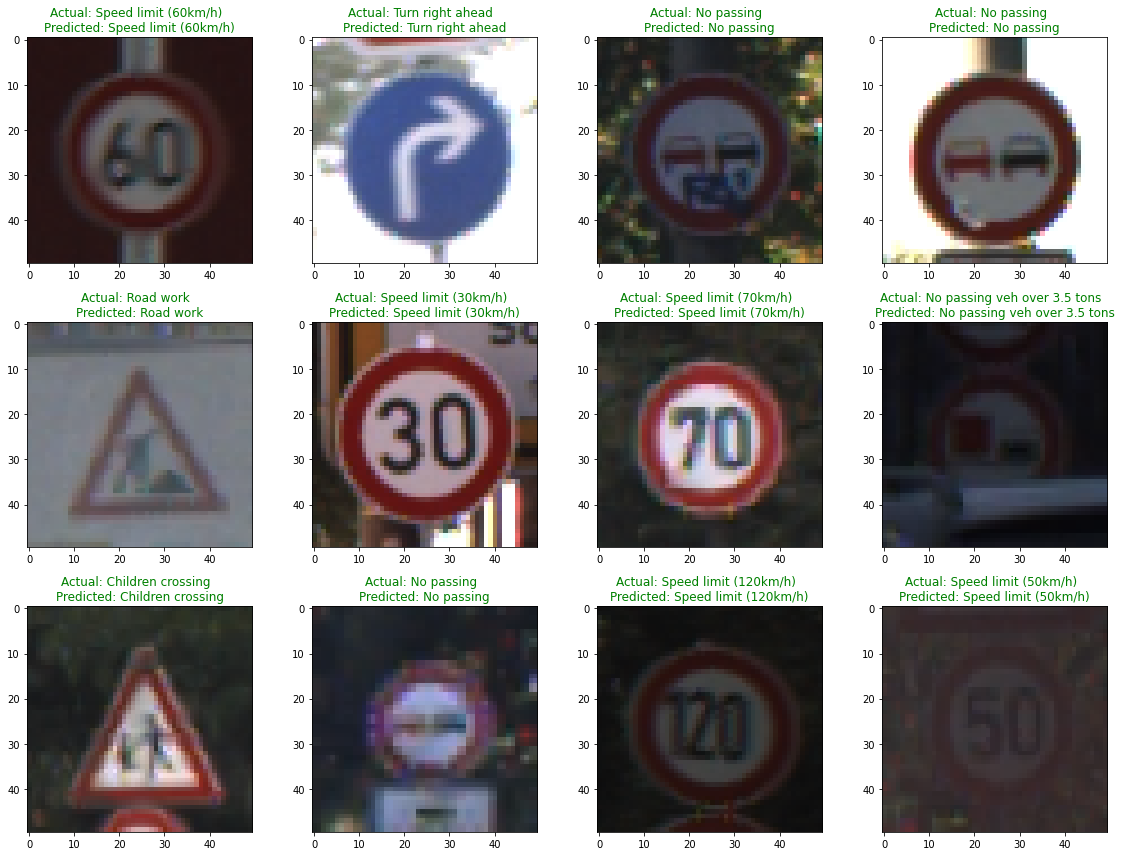

In [75]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else: 
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

### 1.2 Transfer Learning Using MobileNetV2

In this section we will take a look at Transfer Learning model.  
This model is using MobileNetV2 model as a base model for the new model.

#### 1.2.1 Defining the base model
The base model and its properties are defined in the next cell.
- tf.keras.applications.MobileNetV2 function loads the architecture and layers of MobileNetV2 model.
- the input shape defines the shape of the input to the model, this is similar to whats being used in the CNN
- include_top is set to false, this ensures that the fully connected and output layers are not included while importing the model. This kept this way cause Taher has added his own custom layers for the classification and output.
- setting the weights to imagenet, initializes the model with pretrained weight of the model from ImageNet database.
##### Freezing the weights of the model
On the next line of code, the trainable parameters of the base model is set to false. This means the weights of the pretrained model would not be updated while training. And only the weights of the additional layers would be altered.
This is what makes this model a tranfer learning model, where the new model is taking the advantages of the knowledge of the pre trained model and use it for our task. This method is usefull when the dataset you have is limited. As the pre trained model are trained with a large size of dataset, which in this case is ImageNet.  

#### Transfer learning
Training a deep learning model can take an lot of time and money. 
In order to avoide that,In tranfer learning , we use the pretrained models and there knowledge to design a new model based on it. This appoach enables us to use the models trained on the large amounts of data.
These pretrained model reduce the erros and the time required for training.
In tranfer learning we initiate our model with the weights of pretrained models and those weights are freezed so they are not updated during training.  

*(S. Mascarenhas and M. Agarwal, "A comparison between VGG16, VGG19 and ResNet50 architecture frameworks for Image Classification,",2021)*  
*(Tulasi Krishna, Sajja & Kalluri, Hemantha kumar. (2019). Deep Learning and Transfer Learning Approaches for Image Classification,2019)*

(https://keras.io/api/applications/mobilenet/)

In [88]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (height, width, 3), include_top = False, weights = "imagenet")
base_model.trainable = False

#### 1.2.2 Creating Tranfer Learning Model based on a base model
In this code, Taher is defining the additional custom layers for the model on top of the base model.
The additional layers are Average Pooling, Dropout,Dense and Batch Normalization.
This is pretty similar to the CNN model and its output layers

In [89]:
mob_model = tf.keras.Sequential([base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dropout(0.2),
                                   keras.layers.Dense(512, activation='relu'),
                                   keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.2),
                                   keras.layers.Dense(43, activation='softmax')                                    
                                ])
mob_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               655872    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 43)               

#### 1.2.3 Configuration and Compilation of Model
This cell configures and compiles the model.
Its exactly like what was done in CNN model

In [91]:
alpha=0.01
epochs=8
optim = keras.optimizers.Adam(learning_rate=alpha)
mob_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 1.2.4 Training the model
This cell trains the model and again this is also exactly like the CNN model.
All the attributes are same, only the numberof epochs is kept as only 8

In [ ]:
mob_history = mob_model.fit(train_dataset,
                          steps_per_epoch=len(train_dataset),
                          epochs=epochs,
                          validation_data=test_dataset,
                          validation_steps=len(test_dataset))

Epoch 1/8
210/210 [==============================] - 51s 226ms/step - loss: 1.3672 - accuracy: 0.5880 - val_loss: 2.0789 - val_accuracy: 0.4561
Epoch 2/8
210/210 [==============================] - 47s 222ms/step - loss: 0.8407 - accuracy: 0.7175 - val_loss: 2.1033 - val_accuracy: 0.4756
Epoch 3/8
210/210 [==============================] - 46s 220ms/step - loss: 0.7144 - accuracy: 0.7598 - val_loss: 2.0578 - val_accuracy: 0.4804
Epoch 4/8
210/210 [==============================] - 47s 226ms/step - loss: 0.6428 - accuracy: 0.7816 - val_loss: 2.1762 - val_accuracy: 0.4853
Epoch 5/8
210/210 [==============================] - 46s 218ms/step - loss: 0.5713 - accuracy: 0.8052 - val_loss: 2.2068 - val_accuracy: 0.4928
Epoch 6/8
210/210 [==============================] - 46s 219ms/step - loss: 0.5317 - accuracy: 0.8201 - val_loss: 2.4569 - val_accuracy: 0.4593
Epoch 7/8
210/210 [==============================] - 46s 221ms/step - loss: 0.4999 - accuracy: 0.8287 - val_loss: 2.2643 - val_accuracy:

#### 1.2.5 Plotting the results of the training per epoch 

In this section, the loss and accuracy for model in each epoch is ploted as a graph.

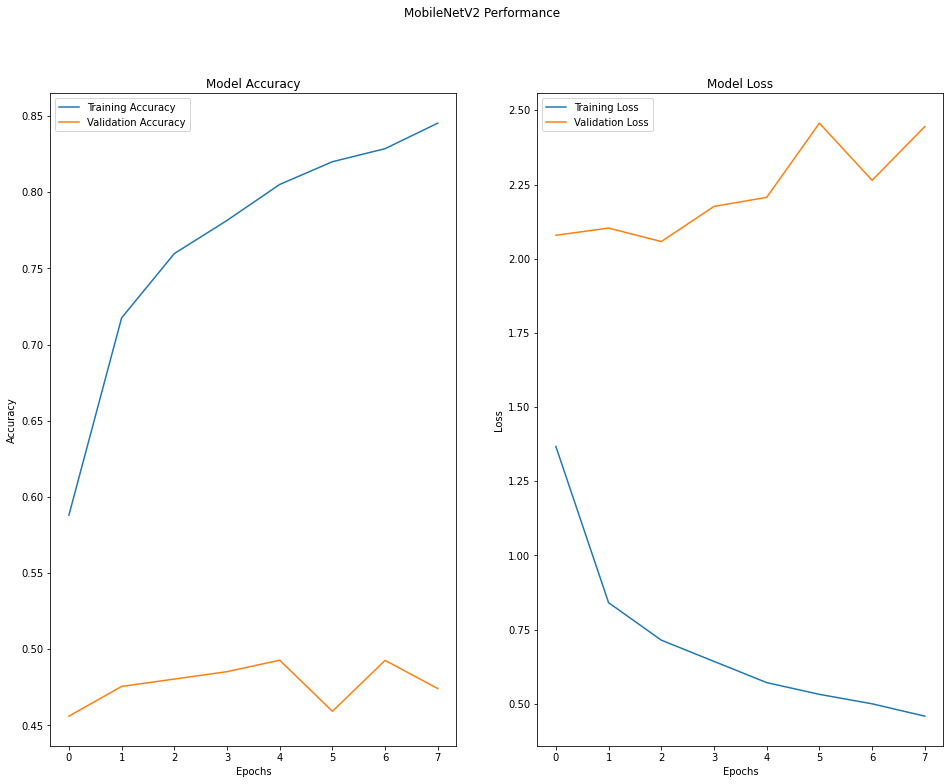

<Figure size 720x504 with 0 Axes>

In [96]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(mob_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# ax[0].set_ylim(0.5,1)
fig.suptitle('MobileNetV2 Performance')
plt.show()

#### 1.2.6 Evaluating the model accuracy
This section calculated the accuracy of the model.
The accuracy of this model is 35.63 percent.

In [93]:
from sklearn.metrics import accuracy_score
pred = mob_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  35.62945368171022


### 1.3 Fine Tuned Model Using VGG19

Fine Tuned models also use the pre trained model like transfer learning, but the difference is that we dont uptade the weights of the base model during training the new model.  
But in fine tuned model, we update the pre trained weights of the base model and fine tune them with according to the data base we have with us.  
Fine tuning is used when the task that we want to perform is similar to the task of pre trained model but its not identical.

#### VGG19 Model:
Full form of VGG is Visual Geometry Group. There are two main types of VGG, i.e. VGG19 and VGG16.  
VGG19 has total 16 convolutional layers which are divided into 5 blocks. After every block there is maxpool layer which decreases the size of imput image by 2.
Also with every block the number of filter in the VGG19 doubles. VGG19 uses  smaller 3x3 size kernel, this and the progressive increase in number of filters help in extracting more and more complex features.   

*(Khattar, Anuradha & Quadri, Syed., “Generalization of convolutional network to domain adaptation network for classification of disaster images on twitter”,2022)*

#### 1.3.1 Defining the model
The next cell defines a fine tuned model vgg_model.
Its just like the tranfer learning model with MobileNetV2, only change is that base model is not set as not trainable.


In [35]:
vgg_model = tf.keras.Sequential([VGG19(weights='imagenet', include_top=False, input_shape=(height,width,3)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(43, activation='softmax')
                                ])

vgg_model.summary()

80150528/80134624 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 43)                22059     
Total params: 20,311,147
Trainable params: 20,310,123
Non-trainable params: 1,024
_________________________________________________________________


#### 1.3.2 Configuration and Compilation of the model

Again its just like the previous two model.
It defines the parameters like learing rate and epochs and optimizer function.

In [36]:
alpha=0.0001
epochs=8
optim = keras.optimizers.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 1.3.3 Training the model
The cell has the code to train the model defined earlier

In [37]:
vgg_history = vgg_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
210/210 [==============================] - 53s 238ms/step - loss: 0.7533 - accuracy: 0.8495 - val_loss: 0.5790 - val_accuracy: 0.9513
Epoch 2/8
210/210 [==============================] - 49s 234ms/step - loss: 0.0539 - accuracy: 0.9937 - val_loss: 0.1357 - val_accuracy: 0.9747
Epoch 3/8
210/210 [==============================] - 49s 232ms/step - loss: 0.0298 - accuracy: 0.9953 - val_loss: 0.0650 - val_accuracy: 0.9838
Epoch 4/8
210/210 [==============================] - 49s 235ms/step - loss: 0.0163 - accuracy: 0.9972 - val_loss: 0.0841 - val_accuracy: 0.9791
Epoch 5/8
210/210 [==============================] - 48s 231ms/step - loss: 0.0106 - accuracy: 0.9985 - val_loss: 0.0710 - val_accuracy: 0.9818
Epoch 6/8
210/210 [==============================] - 50s 236ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0653 - val_accuracy: 0.9838
Epoch 7/8
210/210 [==============================] - 49s 235ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.0543 - val_accuracy:

#### 1.3.4 Plotting the results of the traiing
This cell is same as previous two model, where the accuracy and loss for traiing and validation is plotted agianst the number of epochs as graphs

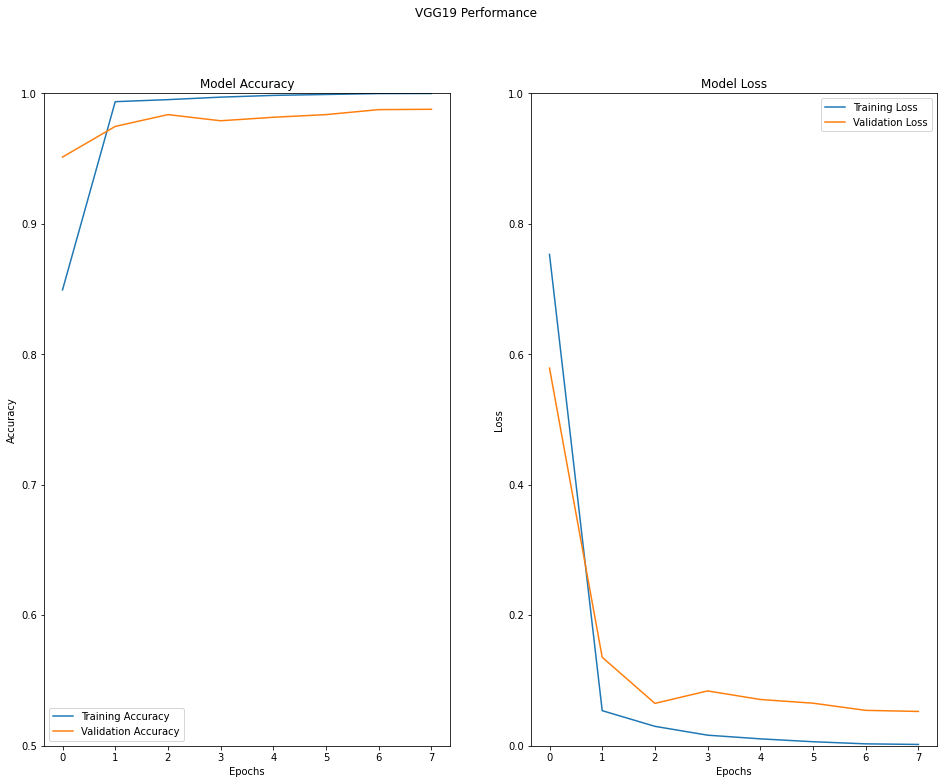

<Figure size 720x504 with 0 Axes>

In [45]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('VGG19 Performance')
plt.show()

#### 1.3.5 Evaluating the accuracy
The next cell calculates the accuracy of the model.
The accuracy of this model is 88.88 percent

In [86]:
from sklearn.metrics import accuracy_score
pred = vgg_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  88.88361045130641


In [40]:
vgg_model.save("VGG.h5")

#### 1.3.6 Displaying some images from test dataset and there predicted and actuall class

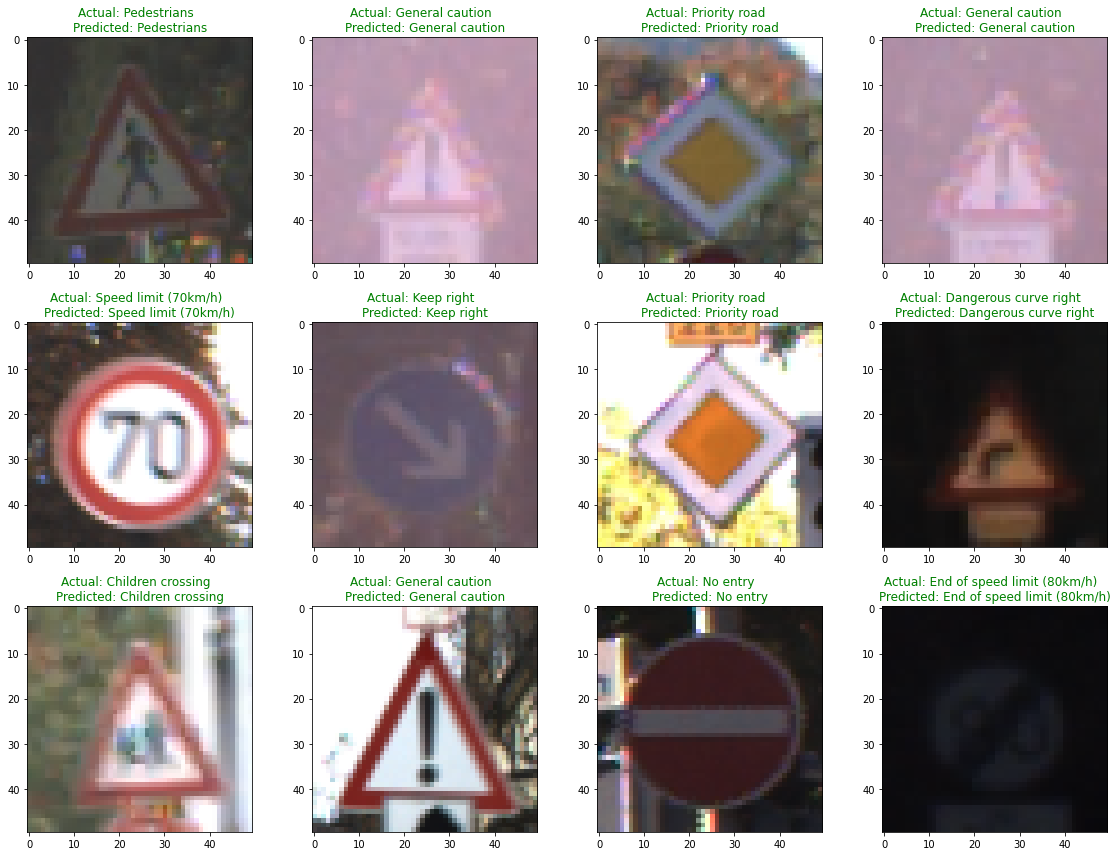

In [84]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = vgg_model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))
for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else: 
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

## 2.  Experiments with the CNN model from Taher and its Summary

### 2.1 Summary of the experiments

While experimenting with the CNN model from taher, we created 2 significant different models.  
#### 1. Model 1:
- In the first model, we changed the number of filters used in the 4th convolutional layer from 64 to 128. This gave us the convolutional layer with increament in number of filter at each step.  
- fist filter with 16 filters, second with 32, third with 64 and fourth with 128.
- total number of parameter and trainable parameters increased due to this.
- the traning time for the epochs also increased.
- The accuracy of the model was 88.01 percent

#### 2. Model 2:
- In this model, we removed one of the convolutional layer i.e. the last layer and altered the number of filter for third convolutional layer to 128.
- fist filter with 16 filters, second with 32, third with 64
- Accuracy for this model was 79.31 percent, which is less than the original model

#### 3. Model 3:
- In model 3, we set the dropout rate to 0.5 keeping the rest of the parameters same as model 2.
- The number parameters was 2191627 and trainable parameters were 2190411
- the accuracy of this model dropped further to 76.83
- the reason for the dropp in accuracy might be that the too much regularization was added to model. Given that this is not a highly complex model the dropout rate of 0.5 can be too much

#### 4. Model 4
- In Model 4 we increased the pool size to 3x3
- This had no effect on the number of parameters and trainable parameters
- The accuracy of this model decresed to 72.48
- Also the execution time decreased as well.
- Reason for the drop in accuracy is that the larger pool size leads to more generalization of the data which reduces the accuracy.

Note: You can find the models created for experiments in the follow notebook:  
https://github.coventry.ac.uk/gardip/Coursework_7137CEM-Deep_Learning-2324AAA/blob/main/CNN-main/GTSRB_Keras_Classifier/gtsrb-prediction-cnn.ipynb 

The summary and the comparison of two models mentioned above with the orignal model is as follow:

|Metric                      |Original Model|Model 1|Model 2|Model 3|Model4|
|----------------------------|--------------|-------|-------|-------|-----|
|Changed Hyperparameter      |NA            |Increased Number of filters|Removed convolutional layer|Increased Dropout Rate|Increased Pool Size|
|Total Parameters            |2191627       |4325963|5380107|2191627|2191627|
|Trainable Parameters        |2190411       |4324619|5378763|2190411|2190411|
|AVG. Training Time per Epoch|247.25        |388.53 |211.33 |226    |172.8|
|Accuracy                    |82,02         |88.01  |79.31  |76.83  |72.48|


As we can see from the table;  
- Due to additional filters in model 1 the accuracy of model has increased. Also the training time increases as anticipated. Cause more number of filters are able to capture more features during training which leads to better predications and accuracy.
- For model 2 although the number of parameters are highest, the accuracy of the model is less. This shows that more parameters will not necessarily lead to better accuracy.
The reason for the lesser accuracy might be the overfitting. We can improve the accuracy by adding convoltional layer with greater kernel size and more filters before this layer which creates an inreasingly minute levels of filters which are better able to capture the more and more complex features.
- The dropout rate needs to moderated properly the high value of dropout rate can introduce more regularization to data and reduce accuracy

### 2.2 CNN model from the experiments trying to improve upon Taher's Model
While experimenting with the Tahers model, model 1 from the summary was able to significantly improve upon the original Model.
You can find the Model and its result in the next Cells.  
This model was able to yeild 88.01 percent accuracy.

In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 21, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 21, 21, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 128)       7

In [ ]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

Epoch 1/15


2023-11-23 22:21:37.159544: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2023-11-23 22:21:37.166154: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.


210/210 [==============================] - 674s 3s/step - loss: 0.5352 - accuracy: 0.8654 - val_loss: 0.4266 - val_accuracy: 0.8866
Epoch 2/15
210/210 [==============================] - 288s 1s/step - loss: 0.0571 - accuracy: 0.9828 - val_loss: 0.3354 - val_accuracy: 0.9190
Epoch 3/15
210/210 [==============================] - 259s 1s/step - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.5062 - val_accuracy: 0.9063
Epoch 4/15
210/210 [==============================] - 258s 1s/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.4311 - val_accuracy: 0.9188
Epoch 5/15
210/210 [==============================] - 258s 1s/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.4738 - val_accuracy: 0.9119
Epoch 6/15
210/210 [==============================] - 259s 1s/step - loss: 0.0389 - accuracy: 0.9889 - val_loss: 0.5119 - val_accuracy: 0.9185
Epoch 7/15
210/210 [==============================] - 258s 1s/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.2826 - val_accuracy: 0.9440
Epoch 8/15

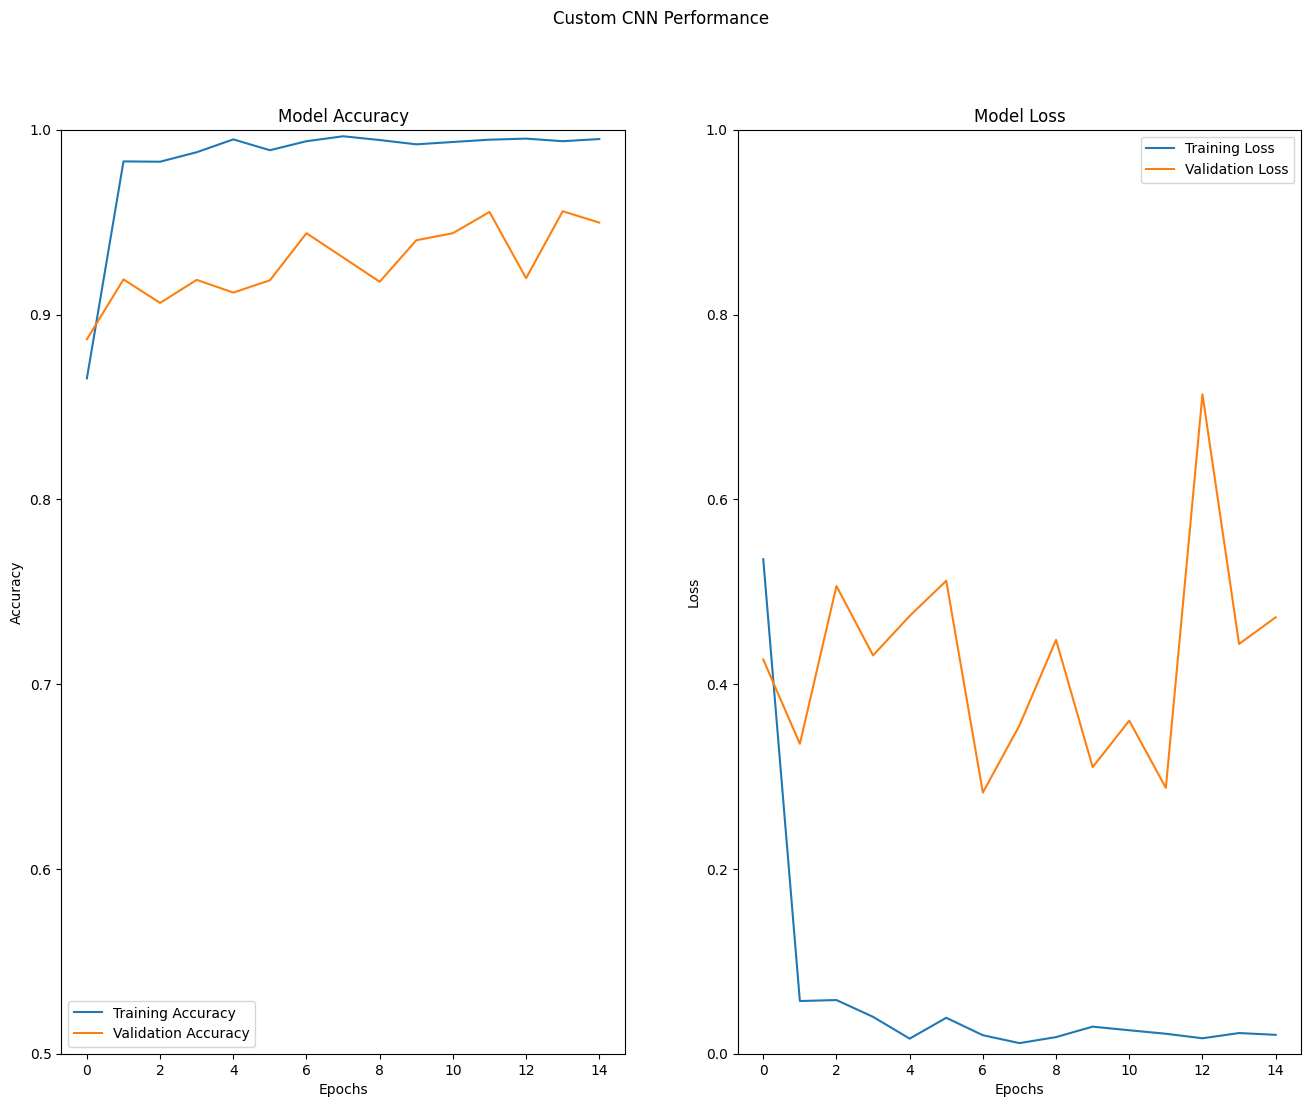

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [ ]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv(data_dir + 'Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred_k = pred.argmax(axis=-1)
print(pred_k)
pred = map_pred(pred.argmax(axis=-1))
print(pred)
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 20s 49ms/step
[ 8  1 32 ...  7 40  2]
[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 38, 7, 23, 7, 4, 9, 25, 20, 27, 38, 4, 33, 9, 3, 1, 11, 13, 10, 9, 11, 5, 17, 12, 20, 2, 17, 3, 12, 16, 25, 7, 23, 18, 41, 24, 25, 3, 10, 18, 4, 25, 13, 15, 9, 13, 38, 5, 26, 9, 16, 38, 10, 4, 9, 15, 9, 26, 2, 5, 28, 11, 25, 30, 9, 5, 12, 1, 10, 25, 25, 23, 33, 25, 7, 10, 35, 3, 33, 22, 13, 3, 1, 2, 14, 12, 32, 3, 38, 9, 33, 1, 10, 5, 11, 33, 4, 35, 20, 33, 4, 1, 14, 16, 10, 23, 3, 27, 29, 40, 41, 13, 7, 1, 8, 2, 10, 10, 31, 1, 6, 36, 3, 14, 13, 11, 10, 18, 7, 2, 38, 41, 4, 6, 18, 17, 25, 2, 41, 11, 21, 7, 24, 11, 25, 17, 3, 6, 9, 7, 4, 13, 16, 4, 25, 26, 9, 13, 14, 29, 17, 13, 38, 18, 25, 33, 1, 5, 7, 13, 2, 8, 4, 36, 25, 20, 25, 18, 1, 10, 8, 10, 29, 12, 13, 31, 2, 8, 15, 26, 23, 17, 9, 4, 1, 17, 9, 2, 31, 13, 15, 15, 38, 25, 5, 25, 13, 10, 5, 4, 10, 2, 4, 5, 1, 14, 25, 12, 5, 8, 36, 25, 13, 33, 18, 33, 23, 12, 20, 4, 18, 41, 13, 20, 0, 10, 37, 5, 8, 12, 38, 20, 14

## 3. Creating a new tranfer learning models using other Pretrained models

In this section we have implemented a tranfer learning model, using VGG19 and VGG16 
Just like MobileNetV2 we will create a base model with VGG19 & VGG16 and set it as not trainable.

### 3.1 Transfer Learning Model Using VGG19

#### 3.1.1 Creating base Model with VGGG19

In [ ]:
base_model_vgg19 = tf.keras.applications.VGG19(input_shape = (height, width, 3), include_top = False, weights = "imagenet")
base_model_vgg19.trainable = False

#### 3.1.2 Defining the model
In this section we have defined the model, and created a summary of model.

In [ ]:
vgg19TF_model = tf.keras.Sequential([base_model_vgg19,
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(43, activation='softmax')
                                ])

vgg19TF_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 batch_normalization_4 (Bat  (None, 1, 1, 512)         2048      
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 43)                22059     
                                                                 
Total params: 20311147 (77.48 MB)
Trainable params: 285739 (1.09 MB)
Non-trainable params: 20025408 (76.39 MB)
_________

#### 3.1.3 Configuration and Compilation of model

In [ ]:
alpha=0.0001
epochs=8
optim = keras.optimizers.Adam(learning_rate=alpha)
vgg19TF_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 3.1.4 Training the model

In [ ]:
#trying out the transfer learning approach
vgg19TF_history = vgg19TF_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
210/210 [==============================] - 669s 3s/step - loss: 2.8733 - accuracy: 0.2754 - val_loss: 2.7802 - val_accuracy: 0.3076
Epoch 2/8
210/210 [==============================] - 686s 3s/step - loss: 2.1925 - accuracy: 0.4221 - val_loss: 2.3253 - val_accuracy: 0.3531
Epoch 3/8
210/210 [==============================] - 653s 3s/step - loss: 1.9269 - accuracy: 0.4779 - val_loss: 2.1555 - val_accuracy: 0.3730
Epoch 4/8
210/210 [==============================] - 649s 3s/step - loss: 1.7567 - accuracy: 0.5182 - val_loss: 2.0632 - val_accuracy: 0.3878
Epoch 5/8
210/210 [==============================] - 702s 3s/step - loss: 1.6291 - accuracy: 0.5465 - val_loss: 2.0028 - val_accuracy: 0.3997
Epoch 6/8
210/210 [==============================] - 706s 3s/step - loss: 1.5263 - accuracy: 0.5715 - val_loss: 1.9615 - val_accuracy: 0.4048
Epoch 7/8
210/210 [==============================] - 680s 3s/step - loss: 1.4411 - accuracy: 0.5939 - val_loss: 1.9203 - val_accuracy: 0.4175
Epoch 

#### 3.1.5 Plotting the results of training

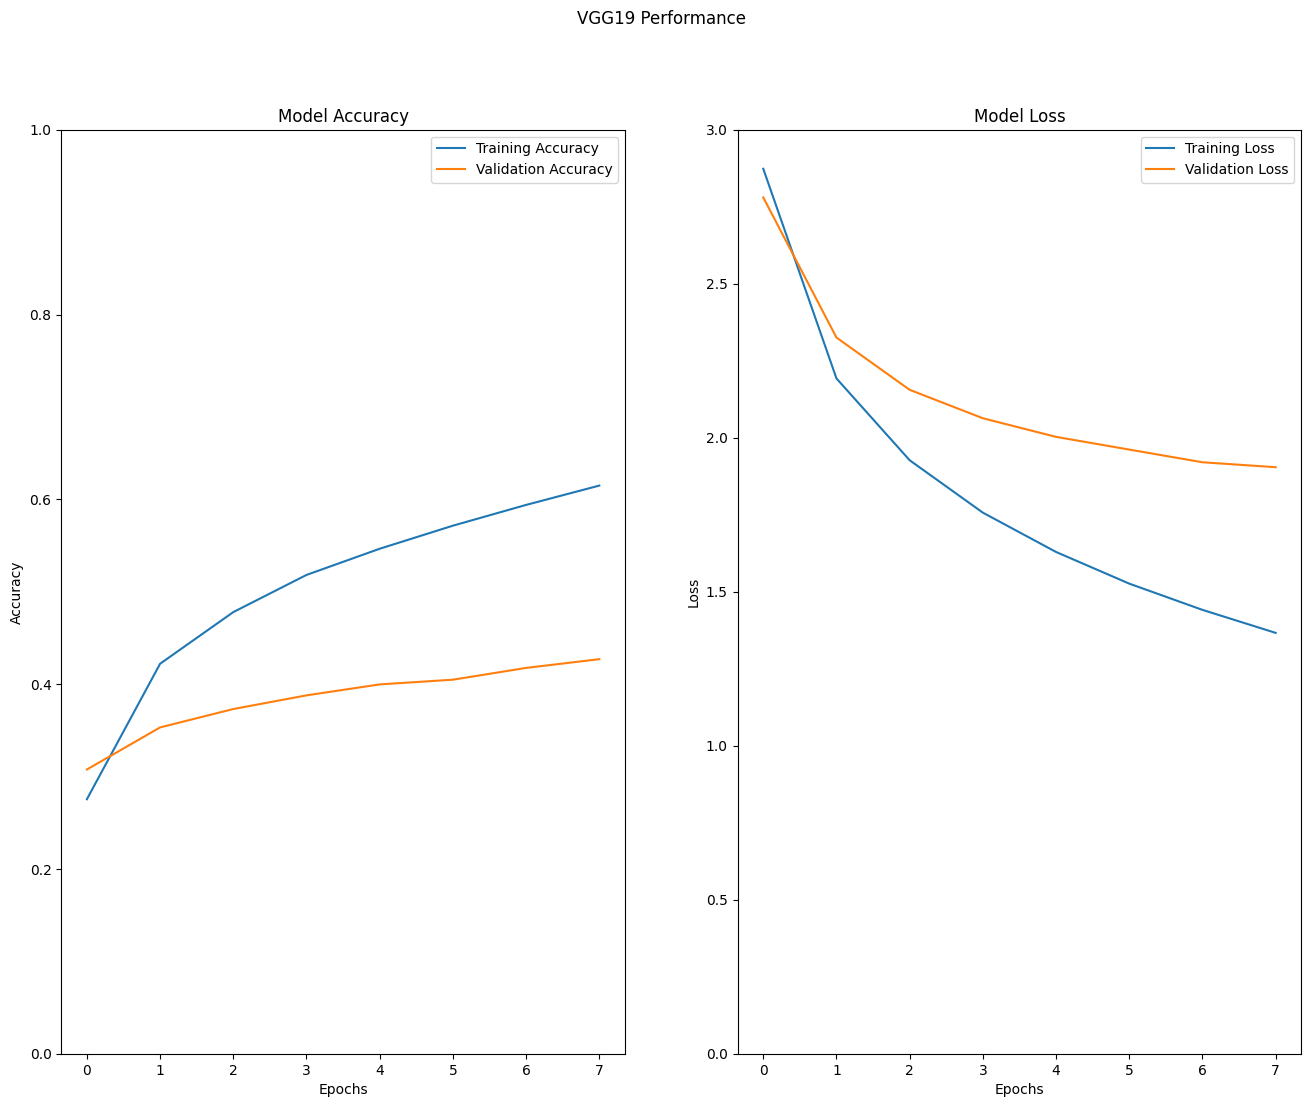

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg19TF_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,3)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0,1)
fig.suptitle('VGG19 Performance')
plt.show()

#### 3.1.6 Evaluating Accuracy of the Model

In [ ]:
from sklearn.metrics import accuracy_score
pred = vgg19TF_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

2023-11-23 13:33:55.447093: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 378900000 exceeds 10% of free system memory.


395/395 [==============================] - 209s 527ms/step
Test Data accuracy:  38.69358669833729


### 3.2 Transfer Learning model using VGG16

#### VGG16 Model
VGG16 is similar in arhcitecture to VGG19 model but he number of layer that have weights in VGG19 are 19 and in VGG16 its 16 layers.  
Out of 16 layers , 13 layers are for convolution. Other than this its has 5 max-pooling layers, 3 dense layers.  
There are 5 pooling layer which has convolutional layer followed with maxpooling layer and after that there are fully connected layers and output layers.  
Just like VGG19 VGG16 uses filters with size of 3x3.

(https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918)

#### 3.2.1 Creating a base model with VGG16

In [ ]:
base_model_vgg16 = tf.keras.applications.VGG16(input_shape = (height, width, 3), include_top = False, weights = "imagenet")
base_model_vgg16.trainable = False

#### 3.2.2 Defining the model
In this section we have defined the model, and created a summary of model.

In [ ]:
vgg16TF_model = tf.keras.Sequential([base_model_vgg16,
                                 keras.layers.BatchNormalization(),
                                  keras.layers.Dropout(rate=0.25),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(43, activation='softmax')
                                ])

vgg16TF_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization_3 (Bat  (None, 1, 1, 512)         2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 43)                22059     
                                                      

#### 3.2.3 Configuration and Compilation of model

In [ ]:
alpha=0.0001
epochs=8
optim = keras.optimizers.Adam(learning_rate=alpha)
vgg16TF_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 3.2.4 Training the model

In [ ]:
#trying out the transfer learning approach
vgg16TF_history = vgg16TF_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
210/210 [==============================] - 549s 3s/step - loss: 2.9253 - accuracy: 0.2606 - val_loss: 2.7568 - val_accuracy: 0.2979
Epoch 2/8
210/210 [==============================] - 551s 3s/step - loss: 2.1998 - accuracy: 0.4150 - val_loss: 2.2458 - val_accuracy: 0.3765
Epoch 3/8
210/210 [==============================] - 550s 3s/step - loss: 1.9212 - accuracy: 0.4711 - val_loss: 2.0381 - val_accuracy: 0.3964
Epoch 4/8
210/210 [==============================] - 549s 3s/step - loss: 1.7458 - accuracy: 0.5140 - val_loss: 1.9311 - val_accuracy: 0.4278
Epoch 5/8
210/210 [==============================] - 549s 3s/step - loss: 1.6227 - accuracy: 0.5410 - val_loss: 1.8625 - val_accuracy: 0.4490
Epoch 6/8
210/210 [==============================] - 548s 3s/step - loss: 1.5245 - accuracy: 0.5689 - val_loss: 1.8214 - val_accuracy: 0.4480
Epoch 7/8
210/210 [==============================] - 566s 3s/step - loss: 1.4466 - accuracy: 0.5851 - val_loss: 1.7757 - val_accuracy: 0.4645
Epoch 

#### 3.2.5 Plotting the results of training

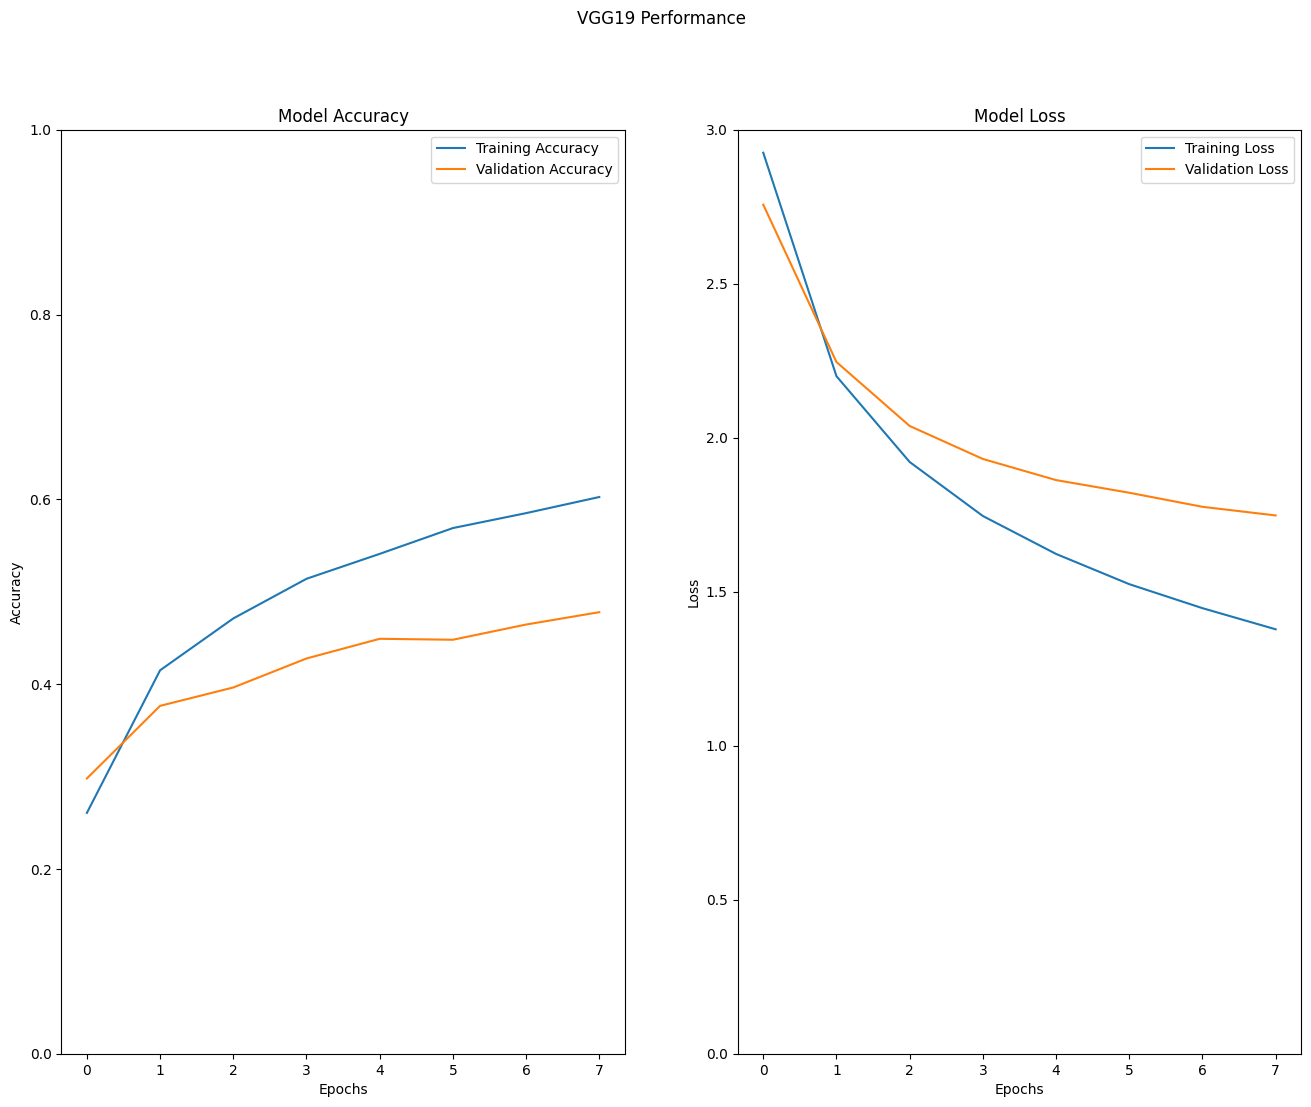

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg16TF_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,3)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0,1)
fig.suptitle('VGG19 Performance')
plt.show()

#### 3.2.6 Evaluating Accuracy of the Model

In [ ]:
from sklearn.metrics import accuracy_score
pred = vgg16TF_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 181s 455ms/step
Test Data accuracy:  36.70625494853523


### 3.3 Summary and observations
The VGG19 model has total 20311147 parameters out of which 285739 are trainable  
The VGG16 model has total 15001451 parameters, out of which 285739 are trainable.  
The low number is as the parameters from the VGG19 and VGG16 model are not trainable.
The VGG19 model gives out 38.69 percent accuracy.  
And the VGG16 model has the accuracy of 36.70  peercent.
This number is higher that what we have for MobileNetV2 but its still a very low number.  
The reasons for the low accuracy of the model might be:
- Overfitting
- Data mistmatch
- Insufficient data  

Most likely the reason in this case would be data missmatch and insusfficient data. VGG19 and VGG16 is trained on a very big dataset like ImageNet while the database we are using is relatively smaller one.
The Likely solution to this is to update the weights of the pretrained models while training the new model. This is called fine tuning.
That is the reason why, when keep the VGG19 model trainable and train that as well with our data set it gives out an accuray of 88.88 percent.
And for VGG16 in the next section we have created fine tuned model which gives 93.5 percent accuracy which is the most of any model we have in this report.

- There are other pre trained models like ResNet, DenseNet and EfficientNet can be used for the transfer learning. But there use seems unnecessary in this scenario as those are very complex models and redundant in case of database like this.

## 4. Fine tuned Learning Model with VGG16

In this section we are creating a fine tuned model based on the VGG16 model and we will compare its accuracy with tranfer learning model and VGG19 fine tuned model.

#### 4.1 Defining The Model

In [ ]:
vgg16_model = tf.keras.Sequential([VGG16(weights='imagenet', include_top=False, input_shape=(height,width,3)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(43, activation='softmax')
                                ])

vgg16_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization_3 (Bat  (None, 1, 1, 512)         2048      
 chNormalization)                                                
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 43)                22059     
                                                                 
Total params: 15001451 (57.23 MB)
Trainable params: 15000427 (57.22 MB)
Non-trainable params: 1024 (4.00 KB)
___________

#### 4.2 Configuration and compilation of the model

In [ ]:
alpha=0.0001
epochs=8
optim = keras.optimizers.Adam(learning_rate=alpha)
vgg16_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 4.3 Training the model

In [ ]:
vgg16_history = vgg16_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
210/210 [==============================] - 2491s 12s/step - loss: 0.7475 - accuracy: 0.8571 - val_loss: 0.6392 - val_accuracy: 0.9301
Epoch 2/8
210/210 [==============================] - 2437s 12s/step - loss: 0.0410 - accuracy: 0.9968 - val_loss: 0.1395 - val_accuracy: 0.9727
Epoch 3/8
210/210 [==============================] - 2330s 11s/step - loss: 0.0246 - accuracy: 0.9971 - val_loss: 0.0661 - val_accuracy: 0.9865
Epoch 4/8
210/210 [==============================] - 2339s 11s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9864
Epoch 5/8
210/210 [==============================] - 2338s 11s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 6/8
210/210 [==============================] - 2336s 11s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9902
Epoch 7/8
210/210 [==============================] - 2333s 11s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy:

#### 4.4 Plotting the results of the training

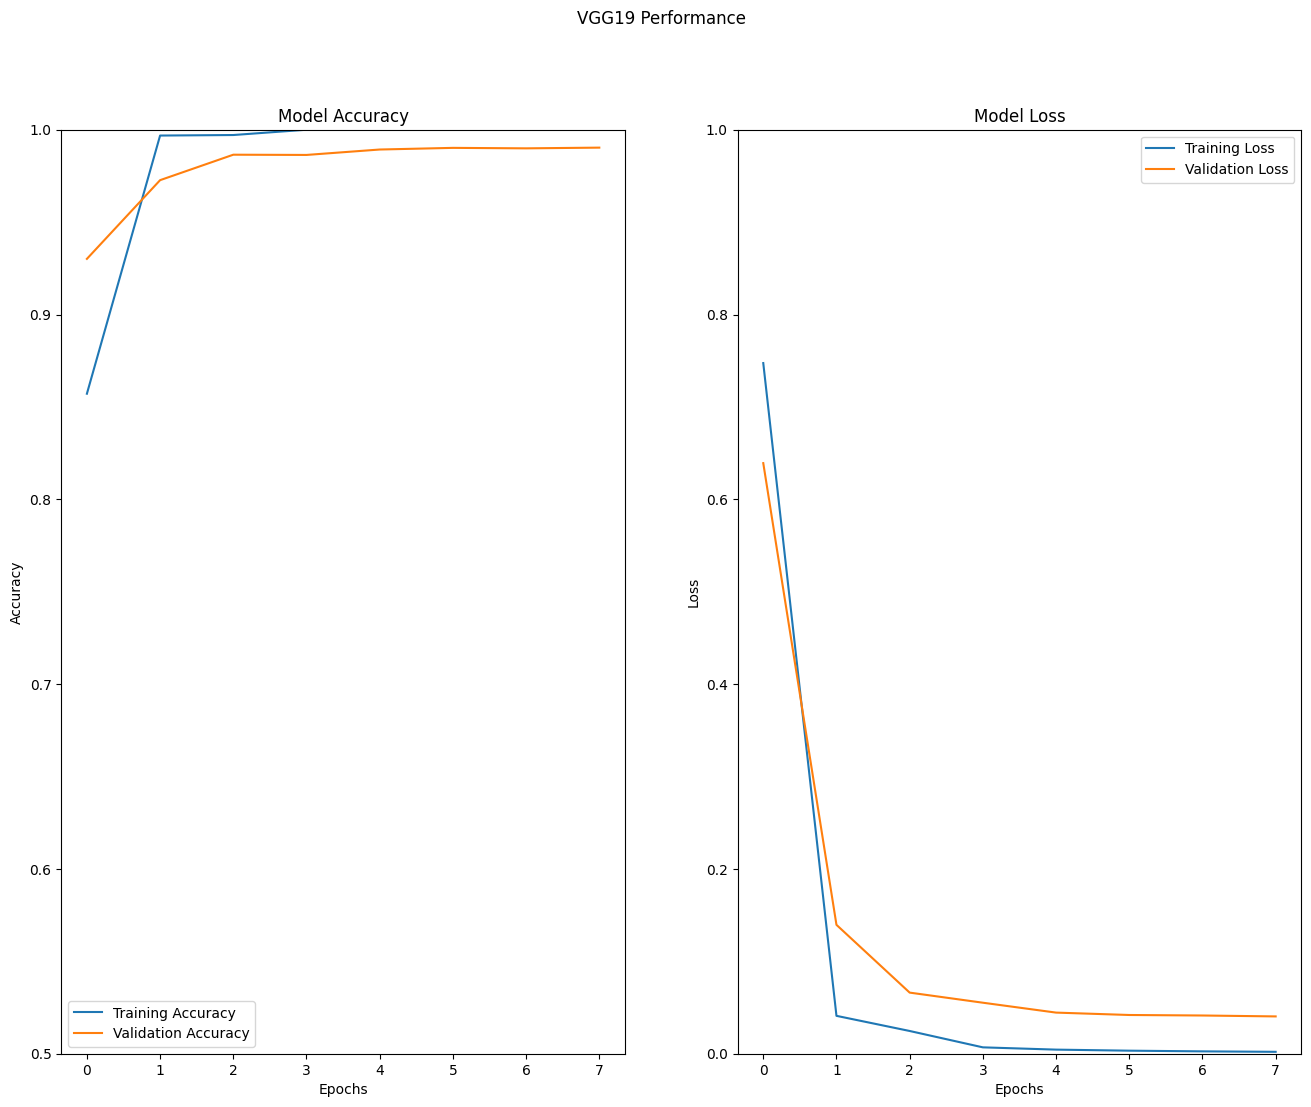

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg16_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('VGG19 Performance')
plt.show()

#### 4.5 Preparing the test data

In [ ]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv(data_dir + 'Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

#### 4.6 Calculating the Accuracy of the model

After ecaluating the model we go the accuracy of 93.43 percent.

In [ ]:
from sklearn.metrics import accuracy_score
pred = vgg16_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 178s 435ms/step
Test Data accuracy:  93.43626286619161


## 5. Summary and Conclusion

### 5.1 Comparison of the results with results of other research and literature

#### Summary of accuracy results for different models

|Models| Accuracy|
|------|---------|
|Custom CNN Model from Taher| 80.82|
|Custom CNN Model from Us   | 88.01|
|Transfer Learning with MobNetV2   |35.62|
|Transfer Learning Model with VGG19|38.69|
|Transfer Learning Model with VGG16|36.70|
|Fine Tuned Model with VGG19       |88.89|
|Fine Tuned Model with VGG16       |93.43|


1. **We were able to achieve the testing accuracy of 38.7 and 36.7 respeective for the VGG19 and VGG16 model suign the transfer learning where we had frozen the weights of pre trained models.**  
- S. Mascarenhas and M. Agarwal were able to achieve the accuracy of the 96.89 and 96.33 percent respectively for VGG19 and VGG16. They were clasifying the 6000 thousand images into 5 classes. They trained there model for 100 epochs where as we trained it for 8 epochs.  
*(S. Mascarenhas and M. Agarwal, "A comparison between VGG16, VGG19 and ResNet50 architecture frameworks for Image Classification,2021)*  

- A. Junaidi, J. Lasama, F. D. Adhinata and A. R. Iskandar, used the tranfer learning models from image classifcation of egg, chicken and hathed egg by creating a database and they were able to achieve the accurray of 90 and 92 percent with VGG16 and VGG19 respectively.  
*(A. Junaidi, J. Lasama, F. D. Adhinata and A. R. Iskandar, "Image Classification for Egg Incubator using Transfer Learning of VGG16 and VGG19', 2021)*

from above examples we can see that the tranfer learning models were not able to achieve a high accuracy for our data base. The most likely reason as we have mentioned in the summary of Tranfer learning model section, might be overfitting and data missmatch.   

***Reason for Low accuracy of the transfer Learning Model***
- *In our case, the reason is probaly the data miss match as the VGG19 and VGG16 models take input shape of (224, 224,3) and the shape defined by taher in the models is       (50,50,3) This is probalbly leading to low accuracy in tranfer learning models.*
- *We tried to train the models by modifying the shape but were were not able to performe those operation due to limitations of the System we are using. Cuase the computations for the images with 224x224 dimesions are likely to complex and need much more powerfull processors.*
- *This assumption about the data miss match can be confirmed by the results of the Custom CNN model and the Fine tuned model with both VGG19 and VGG16. All these 3 models gave a good accuracy.*  

2. **Fine Tuned models yielded a good testing accuracy of 88.89 and 93.43 percents with VGG19 and VGG16 cause the weights of the model would be adjusted as per the current data base in that case.**
- Mahardi, I. -H. Wang, K. -C. Lee and S. -L. Chang, were able to achieve the figures in the similar range.  
They designed an model for classification of dog and cat breeds. They were able to achive the testing accuray of 84.07 percent in case of VGG19 and 83.68 for the VGG16.  
*(Mahardi, I. -H. Wang, K. -C. Lee and S. -L. Chang, "Images Classification of Dogs and Cats using Fine-Tuned VGG Models",2020)*



### 5.2 Future Scope for Improvement
We have used pre trained models like MobNetV2, VGG19 and VGG16. Although these models are complex and accurate,  
We can use more complex and advanced models like ResNet, DenseNet and EfficientNet.  
ResNet have different versions like ResNet50, ResNet101 and ResNet152.
DenseNet has two popular versions DenseNet121 and DenseNet201.
These models have even more number of layers and high accuracy. Also these models have low error rates.  
Obiviously these models have high training time and high memory requirement.  
We can use the pre trained models for these in transfer learning models.   

(https://medium.com/nocoding-ai/densenet121-760df192f12d#:~:text=DenseNet121%20and%20DenseNet201%20are%20two,%2C%20computational%20complexity%2C%20and%20performance.)  
(https://medium.com/mlearning-ai/a-quick-overview-of-resnet-models-f8ed277ae81e#:~:text=In%20ResNet%20models%2C%20all%20convolutional,%2C%20and%20ResNet%2D152).)

## 6. References

1. (Alzubaidi L, Zhang J, Humaidi AJ, Al-Dujaili A, Duan Y, Al-Shamma O, Santamaría J, Fadhel MA, Al-Amidie M, Farhan L.)  
   "Review of deep learning: concepts, CNN architectures, challenges, applications, future directions",2021
2. (Khattar, Anuradha & Quadri, Syed.)  
   “Generalization of convolutional network to domain adaptation network for classification of disaster images on twitter”,2022
3. (S. Mascarenhas and M. Agarwal)  
   "A comparison between VGG16, VGG19 and ResNet50 architecture frameworks for Image Classification,2021
4. (A. Junaidi, J. Lasama, F. D. Adhinata and A. R. Iskandar)
   "Image Classification for Egg Incubator using Transfer Learning of VGG16 and VGG19', 2021
5. (Mahardi, I. -H. Wang, K. -C. Lee and S. -L. Chang)  
   "Images Classification of Dogs and Cats using Fine-Tuned VGG Models",2020
6. (Radiuk, Pavlo.)  
   Impact of Training Set Batch Size on the Performance of Convolutional Neural Networks for Diverse Datasets,,2017
7. (Tulasi Krishna, Sajja & Kalluri, Hemantha kumar)  
    Deep Learning and Transfer Learning Approaches for Image Classification,2019
8. https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720  
9. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html  
10. https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/   
11. https://matplotlib.org/stable/users/explain/axes/axes_intro.html  
12. https://keras.io/api  
13. https://neuralthreads.medium.com/categorical-cross-entropy-loss-the-most-important-loss-function-d3792151d05b  
14. https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html  
15. https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html  
16. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
17. https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918  
